# Examen primero de la UDA Visualizacion de la informacion
---
#### Nombre: Alejandro Alonso Sanchez
#### Instructor: Dr. Salvador Botello Aceves
#### Fecha de aplicacion: 19 de Marzo de 2025

## 1. Basico-conceptual (2 puntos)
---

Asigne correctamente los ejemplos de visualizacion a los diferentes tipos de
graficos en la siguiente tabla:

| Tipo de grafico | Ejemplo de visualizacion (mis respuestas)|
| --------------- | ------------------------- |
| Mapa de calor | D. densidad de poblacion en diferentes regiones de la ciudad |
| Grafico de dispersion | C. Relacion entre el precio de la vivienda y la distancia al centro de la ciudad |
| Grafico de lıneas | B. Evolucion de la temperatura global a lo largo del tiempo |
| Diagrama de caja | E. Distribucion de los salarios en una empresa |
| Grafico de barras | A. Comparacion del PIB de diferentes paises |

## 2. Modelo presa-depredador (3 puntos)
---
Utilizando Python y Matplotlib/Seaborn, genere una visualizacion que represente el equilibrio y estabilidad en un modelo presa-depredador (modelo Lotka-Volterra).
- Implemente el modelo y grafique la evoluci´on de las poblaciones a lo largo
del tiempo.
- Analice la estabilidad del sistema y describa c´omo se visualizan los puntos
de equilibrio.
- Explique c´omo el dise˜no de la visualizaci´on ayuda a comprender mejor la
din´amica del sistema.

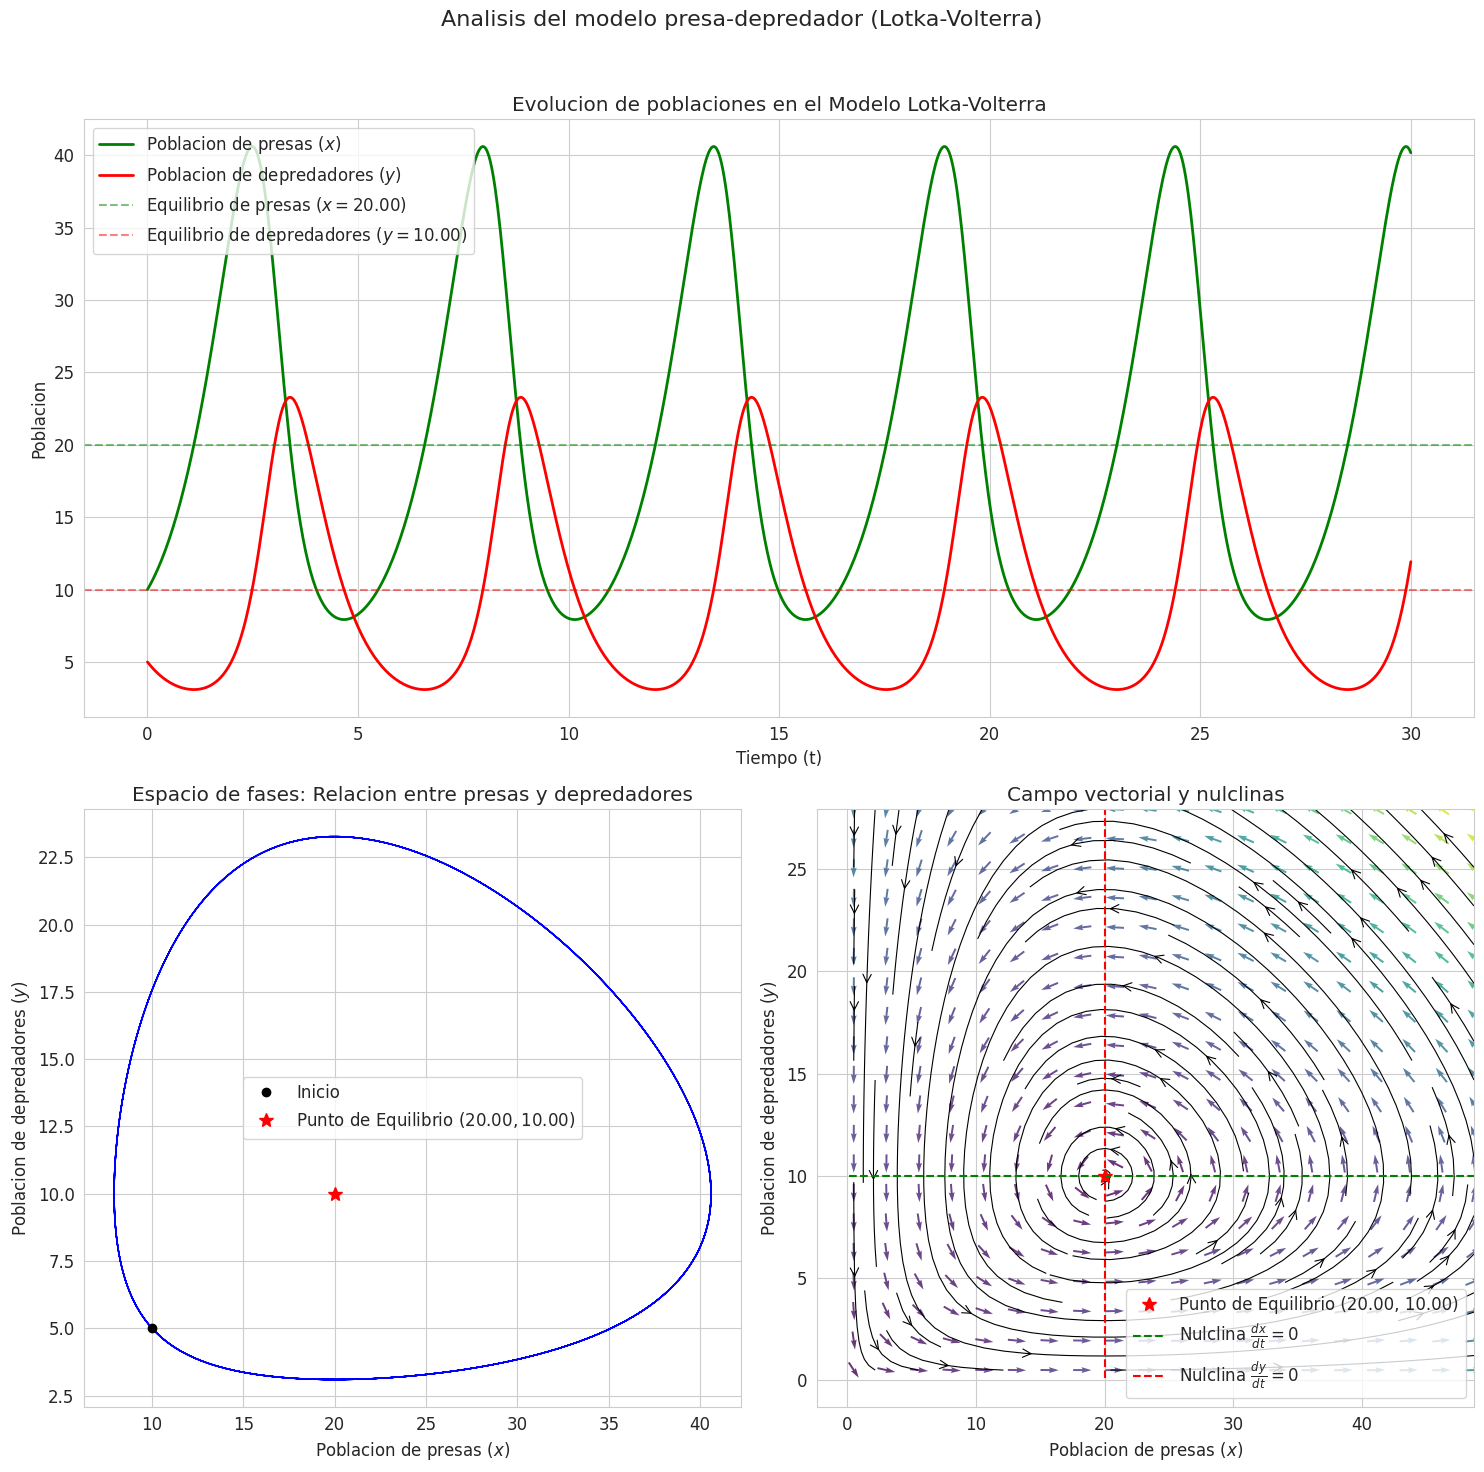

Punto de equilibrio: (x*, y*) = (20.000, 10.000)
Valores propios: [0.+1.22474487j 0.-1.22474487j]
El punto de equilibrio es un centro o tiene estabilidad neutral.
Especificamente, el punto de equilibrio es un centro, lo que explica el comportamiento ciclico.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec
import seaborn as sns

def lotka_volterra(state, t, alpha, beta, delta, gamma):
    x, y = state
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    return [dx_dt, dy_dt]

def simulate_lotka_volterra(alpha, beta, delta, gamma, x0, y0, t_max):
    sns.set_style('whitegrid')
    plt.rcParams['figure.figsize'] = (30, 20)
    plt.rcParams['font.size'] = 12

    state0 = [x0, y0]
    x_eq = gamma / delta
    y_eq = alpha / beta
    t = np.linspace(0, t_max, 1000)

    solution = odeint(lotka_volterra, state0, t, args=(alpha, beta, delta, gamma))
    x_solution, y_solution = solution.T

    fig = plt.figure(figsize=(15, 15))
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(t, x_solution, 'g-', linewidth=2, label='Poblacion de presas ($x$)')
    ax1.plot(t, y_solution, 'r-', linewidth=2, label='Poblacion de depredadores ($y$)')
    ax1.axhline(y=x_eq, color='g', linestyle='--', alpha=0.5, label=f'Equilibrio de presas ($x={x_eq:.2f}$)')
    ax1.axhline(y=y_eq, color='r', linestyle='--', alpha=0.5, label=f'Equilibrio de depredadores ($y={y_eq:.2f}$)')
    ax1.set_xlabel('Tiempo (t)')
    ax1.set_ylabel('Poblacion')
    ax1.set_title('Evolucion de poblaciones en el Modelo Lotka-Volterra')
    ax1.legend()
    ax1.grid(True)

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(x_solution, y_solution, 'b-', linewidth=1)
    ax2.plot(x_solution[0], y_solution[0], 'ko', label='Inicio')
    ax2.plot(x_eq, y_eq, 'r*', markersize=10, label=f'Punto de Equilibrio (${x_eq:.2f}, {y_eq:.2f}$)')
    ax2.set_xlabel('Poblacion de presas ($x$)')
    ax2.set_ylabel('Poblacion de depredadores ($y$)')
    ax2.set_title('Espacio de fases: Relacion entre presas y depredadores')
    ax2.legend()
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, 1])
    x_range = np.linspace(0.5, max(x_solution) * 1.2, 20)
    y_range = np.linspace(0.5, max(y_solution) * 1.2, 20)
    X, Y = np.meshgrid(x_range, y_range)

    DX, DY = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x, y = X[i, j], Y[i, j]
            DX[i, j], DY[i, j] = lotka_volterra([x, y], 0, alpha, beta, delta, gamma)

    magnitude = np.sqrt(DX**2 + DY**2)
    DX_norm = DX / (magnitude + 1e-10)
    DY_norm = DY / (magnitude + 1e-10)

    ax3.quiver(X, Y, DX_norm, DY_norm, magnitude, cmap=plt.cm.viridis, pivot='mid', alpha=0.8)
    ax3.streamplot(X, Y, DX, DY, color='black', linewidth=0.8, density=1, arrowstyle='->', arrowsize=1.5)
    ax3.plot(x_eq, y_eq, 'r*', markersize=10, label=f'Punto de Equilibrio ({x_eq:.2f}, {y_eq:.2f})')

    x_nullcline = np.linspace(0.1, max(x_solution) * 1.2, 100)
    y_nullcline_from_x = np.ones_like(x_nullcline) * (alpha / beta)
    ax3.plot(x_nullcline, y_nullcline_from_x, 'g--', label=r'Nulclina $\frac{dx}{dt} = 0$')

    y_nullcline = np.linspace(0.1, max(y_solution) * 1.2, 100)
    x_nullcline_from_y = np.ones_like(y_nullcline) * (gamma / delta)
    ax3.plot(x_nullcline_from_y, y_nullcline, 'r--', label=r'Nulclina $\frac{dy}{dt} = 0$')

    ax3.set_xlabel('Poblacion de presas ($x$)')
    ax3.set_ylabel('Poblacion de depredadores ($y$)')
    ax3.set_title('Campo vectorial y nulclinas')
    ax3.legend()
    ax3.grid(True)

    plt.suptitle('Analisis del modelo presa-depredador (Lotka-Volterra)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    J_eq = np.array([
        [alpha - beta * y_eq, -beta * x_eq],
        [delta * y_eq, delta * x_eq - gamma]
    ])
    eigenvalues = np.linalg.eigvals(J_eq)
    print(f"Punto de equilibrio: (x*, y*) = ({x_eq:.3f}, {y_eq:.3f})")
    print(f"Valores propios: {eigenvalues}")

    if np.all(np.real(eigenvalues) < 0):
        print("El punto de equilibrio es asintoticamente estable.")
    elif np.all(np.real(eigenvalues) > 0):
        print("El punto de equilibrio es inestable.")
    else:
        print("El punto de equilibrio es un centro o tiene estabilidad neutral.")
        if np.all(np.isclose(np.real(eigenvalues), 0)) and np.any(np.imag(eigenvalues) != 0):
            print("Especificamente, el punto de equilibrio es un centro, lo que explica el comportamiento ciclico.")

    return {
        'time': t,
        'prey': x_solution,
        'predator': y_solution,
        'equilibrium': (x_eq, y_eq),
        'eigenvalues': eigenvalues
    }

results = simulate_lotka_volterra(alpha=1.0, beta=0.1, delta=0.075, gamma=1.5, x0=10, y0=5, t_max=30)

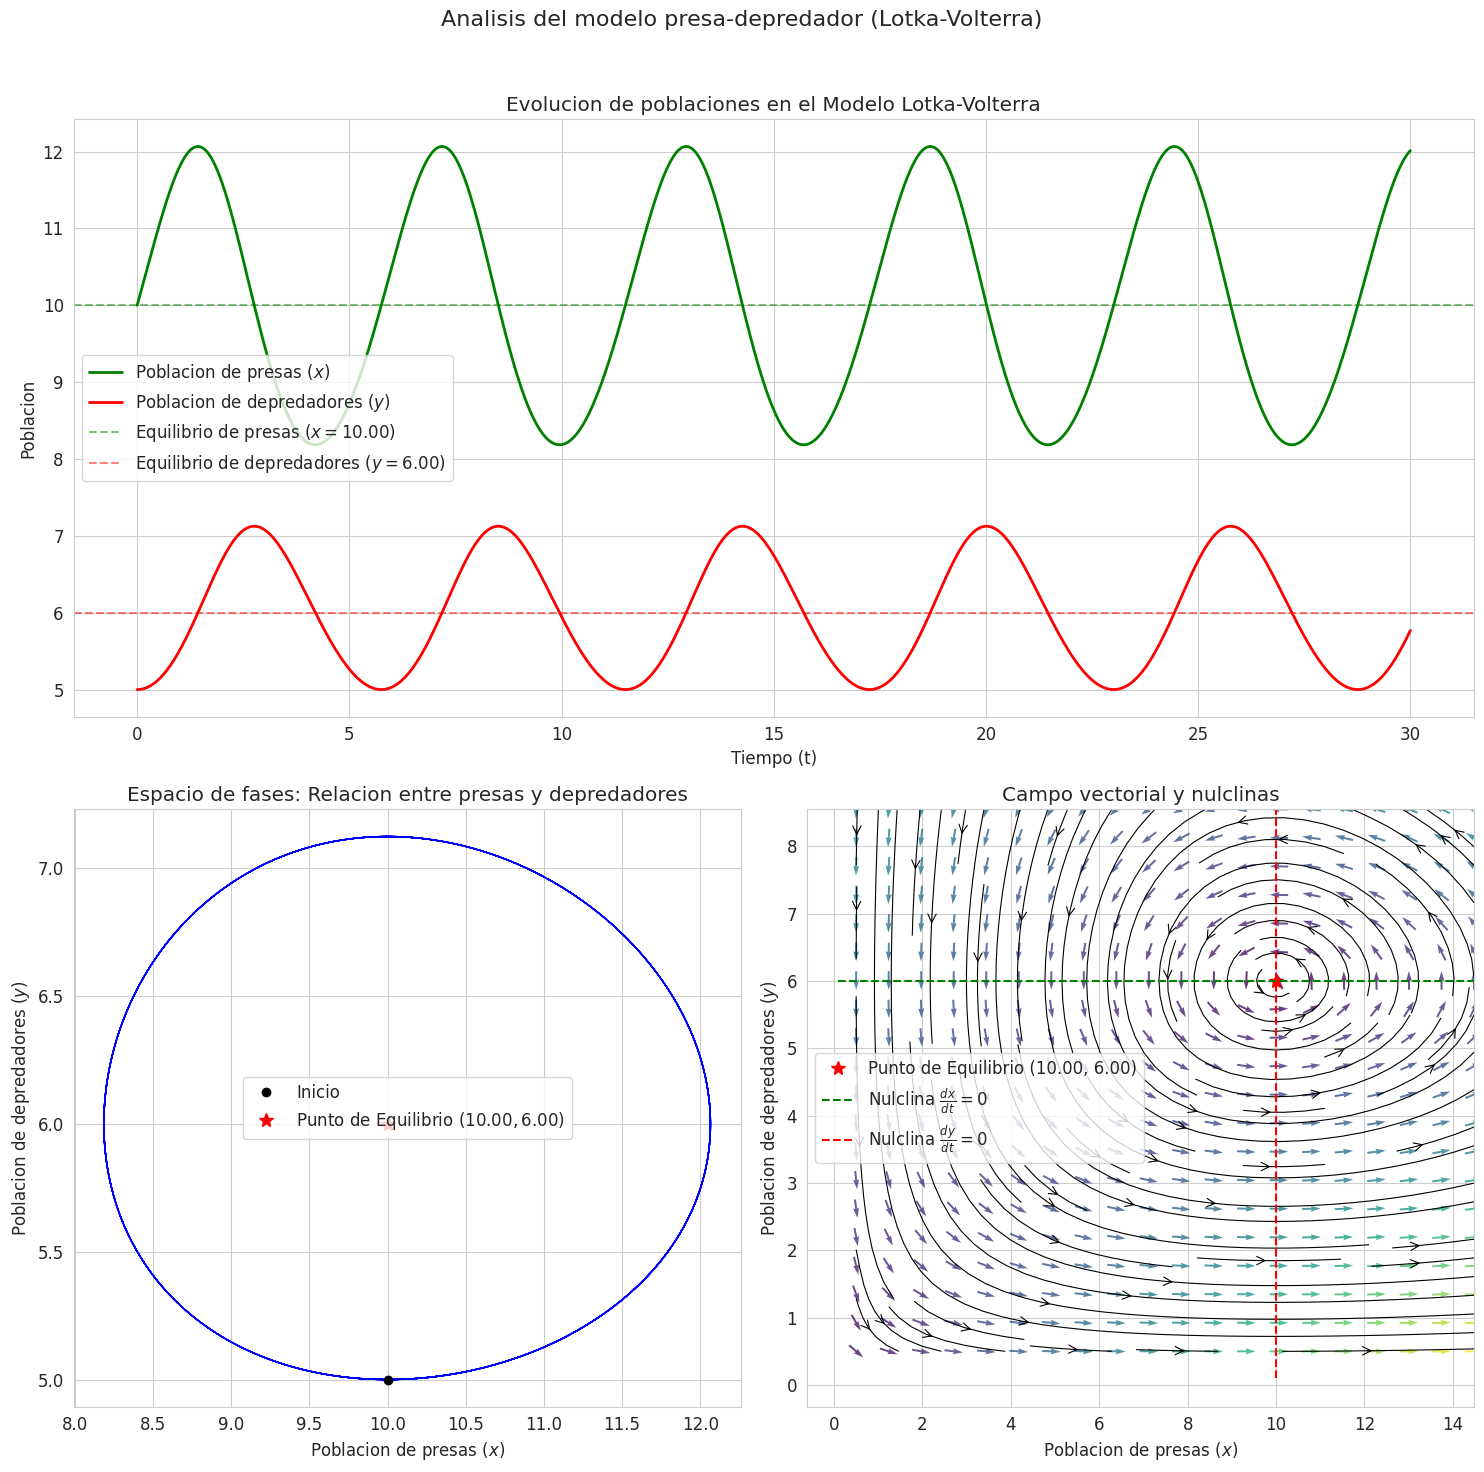

Punto de equilibrio: (x*, y*) = (10.000, 6.000)
Valores propios: [0.+1.09544512j 0.-1.09544512j]
El punto de equilibrio es un centro o tiene estabilidad neutral.
Especificamente, el punto de equilibrio es un centro, lo que explica el comportamiento ciclico.


In [2]:
results2 = simulate_lotka_volterra(alpha=1.2, beta=0.2, delta=0.1, gamma=1.0,  x0=10, y0=5,t_max=30)

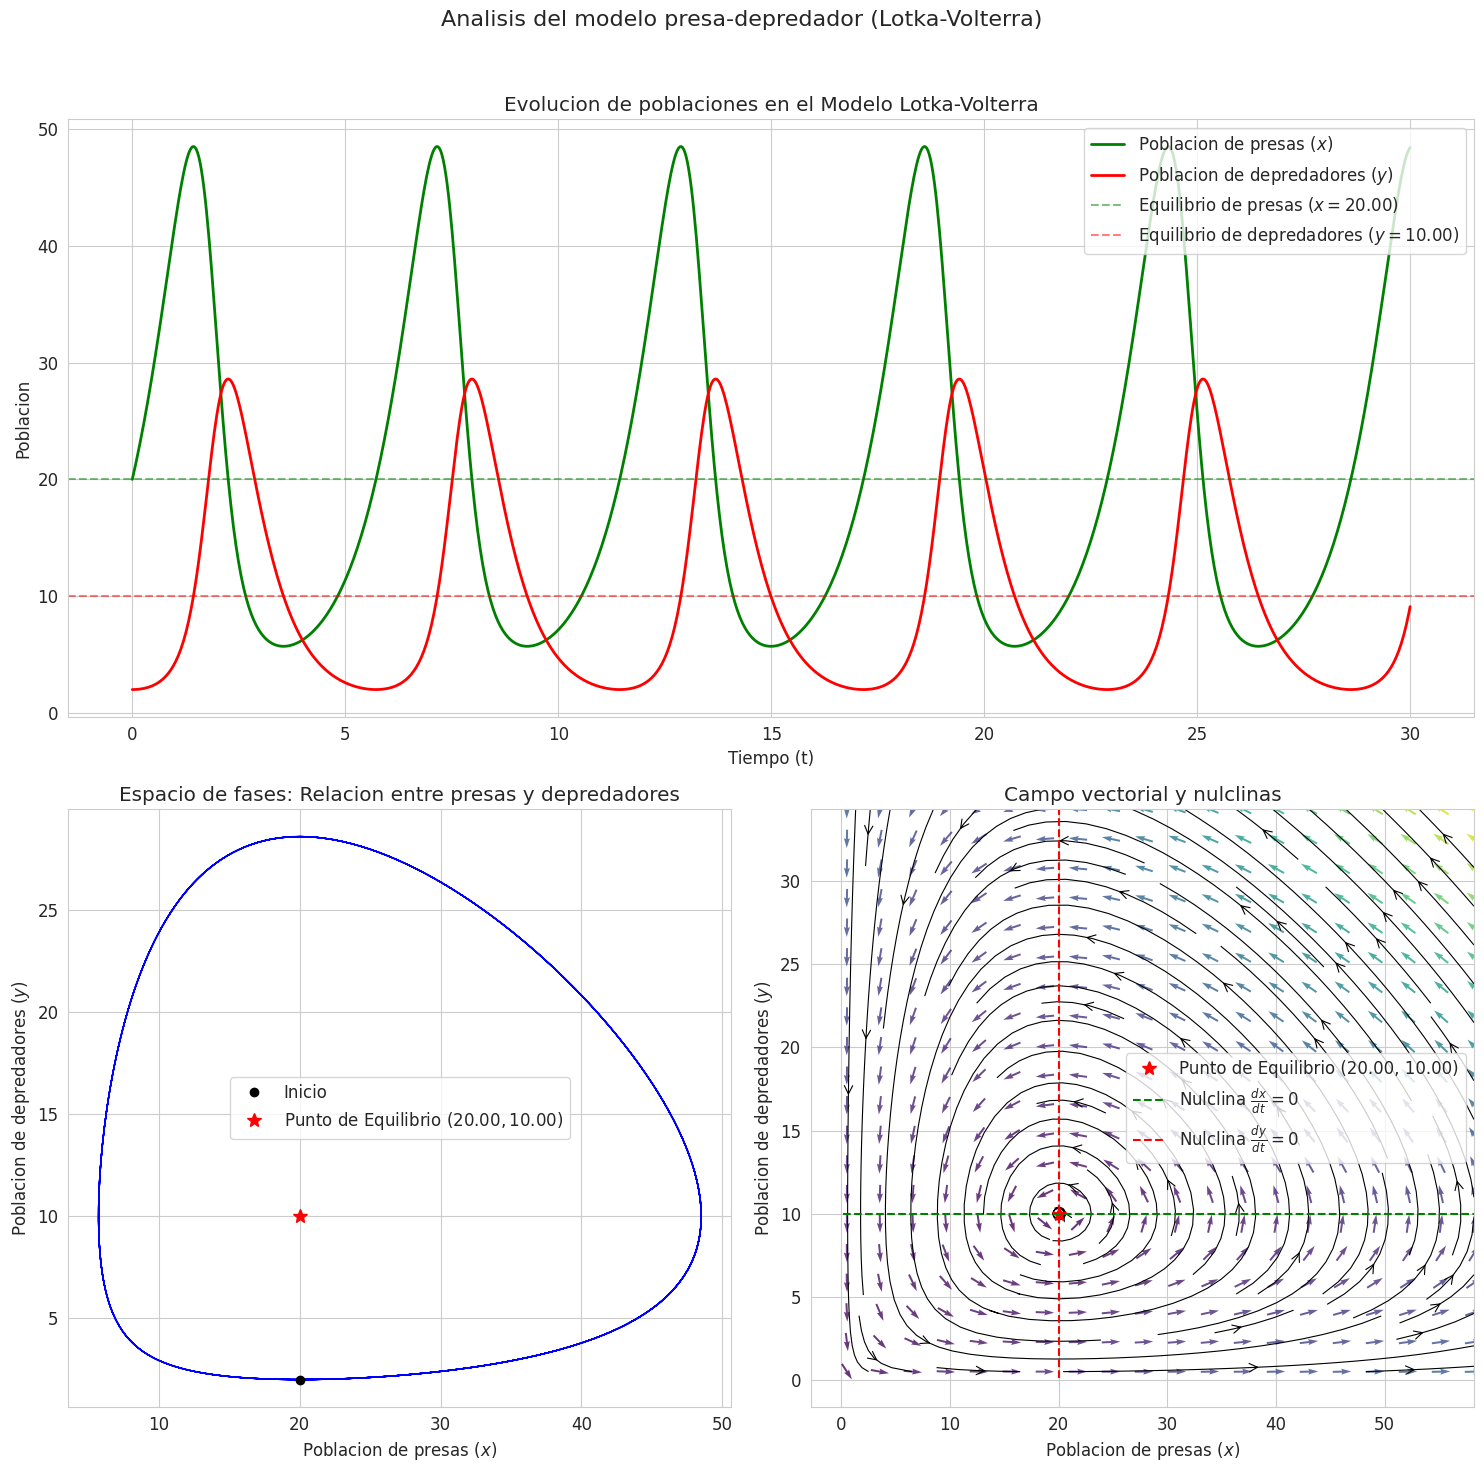

Punto de equilibrio: (x*, y*) = (20.000, 10.000)
Valores propios: [0.+1.22474487j 0.-1.22474487j]
El punto de equilibrio es un centro o tiene estabilidad neutral.
Especificamente, el punto de equilibrio es un centro, lo que explica el comportamiento ciclico.


In [3]:
results3 = simulate_lotka_volterra(alpha=1.0, beta=0.1, delta=0.075, gamma=1.5, x0=20, y0=2, t_max=30)

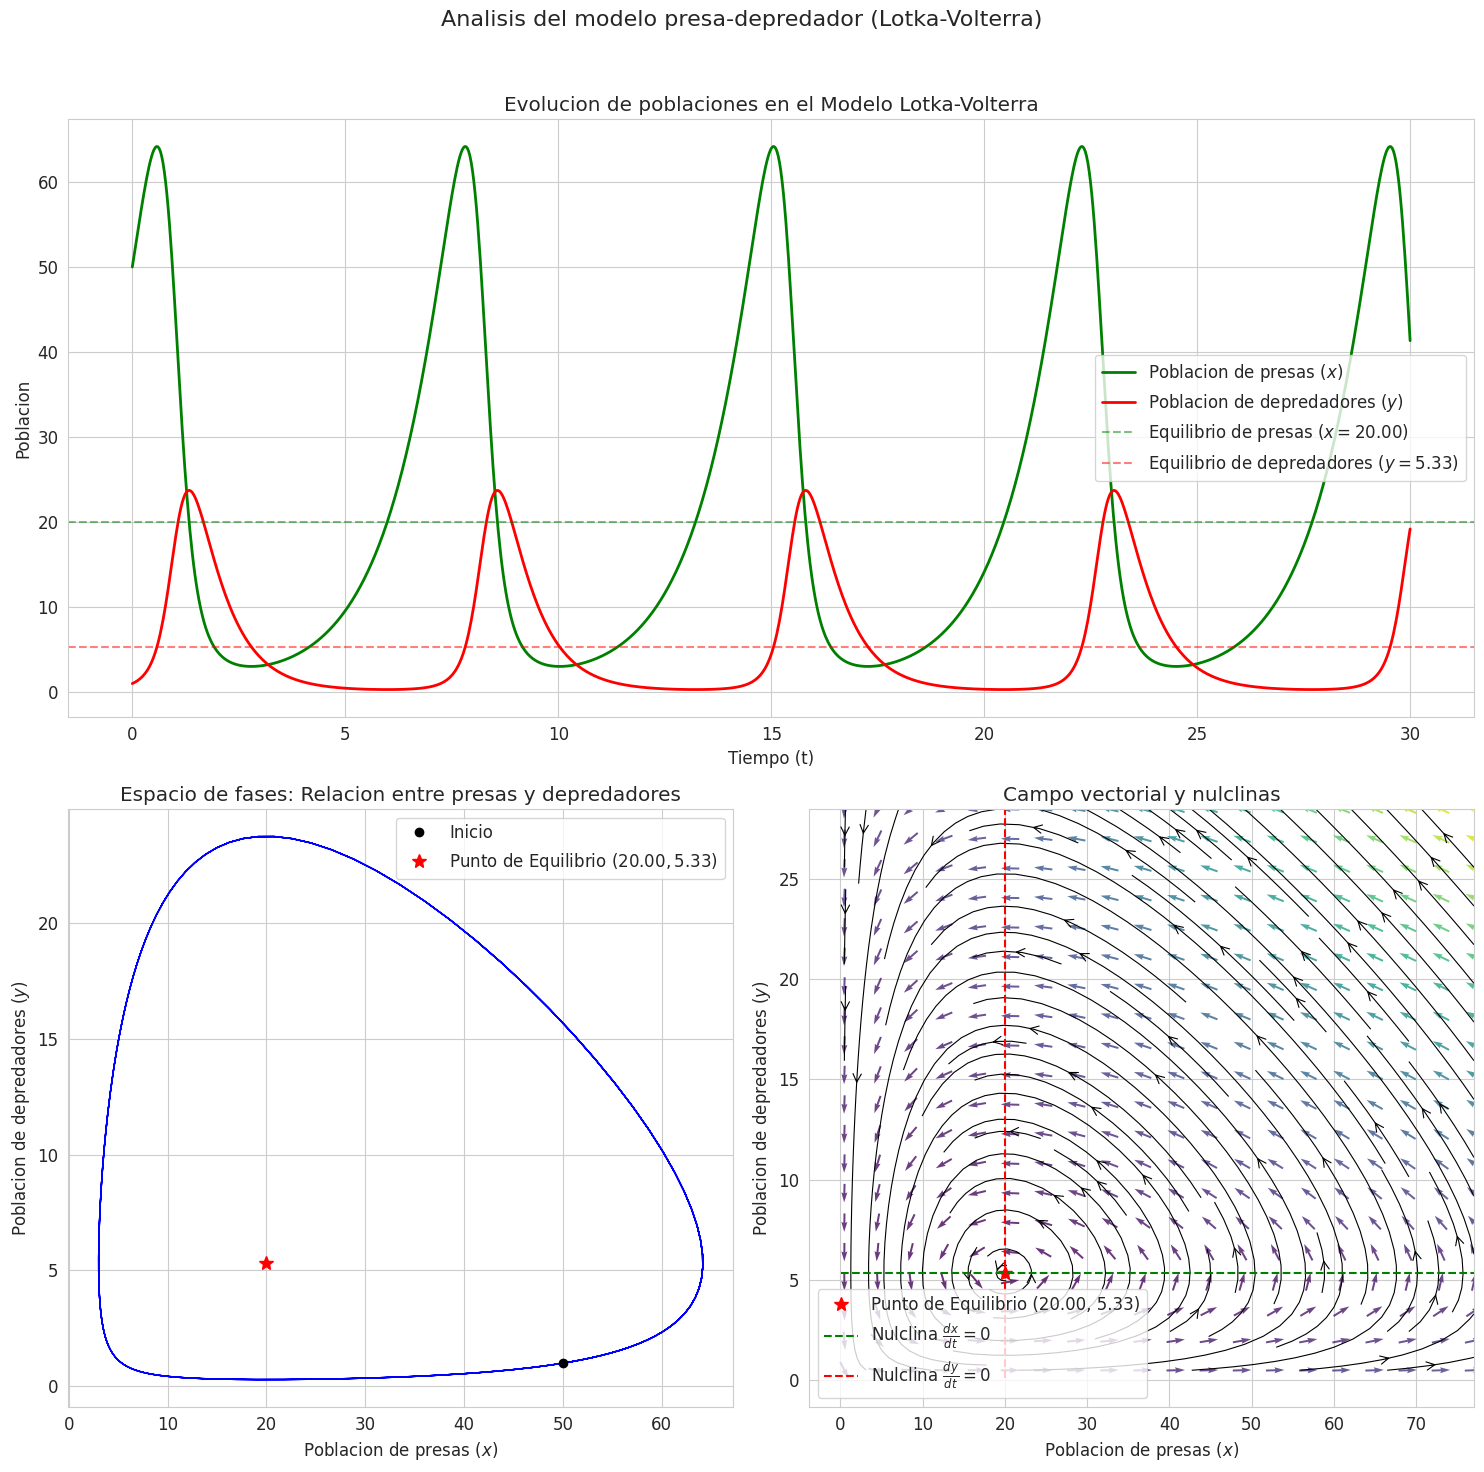

Punto de equilibrio: (x*, y*) = (20.000, 5.333)
Valores propios: [0.+1.09544512j 0.-1.09544512j]
El punto de equilibrio es un centro o tiene estabilidad neutral.
Especificamente, el punto de equilibrio es un centro, lo que explica el comportamiento ciclico.


In [4]:
results4 = simulate_lotka_volterra(alpha=0.8, beta=0.15, delta=0.075, gamma=1.5, x0=50, y0=1, t_max=30)

El sistema de Lotka-Volterra tiene dos puntos de equilibrio importantes:

- Punto de extincion (0, 0):
   - Aqui, ambas especies (presas y depredadores) se extinguen.
   - Es un punto silla, lo que significa que es inestable. Si las poblaciones estan cerca de este punto, tienden a alejarse en una direccion (porque las presas pueden crecer si hay pocos depredadores) pero a acercarse en otra (porque los depredadores mueren si no hay presas).

- Punto de coexistencia (\(x^*, y^*\)):
   - Este punto representa un equilibrio donde las poblaciones de presas y depredadores se mantienen constantes.
   - Es un centro, lo que significa que las poblaciones oscilan alrededor de este punto en ciclos infinitos. No es estable ni inestable, sino neutral.
En las gráficas, estos puntos se ven como:
- Lineas horizontales en la gráfica de evolución temporal (las poblaciones oscilan alrededor de estos valores).
- Un punto en el espacio de fases (marcado con un asterisco), que es el centro de la orbita cerrada.

Aun sin conocer del problema, las graficas muestran claramente el comportamiento del sistema de depredadores y presas.

- La grafica de evolucion temporal:
   - Muestra como cambian las poblaciones de presas y depredadores con el tiempo.
   - Las oscilaciones (subidas y bajadas) muestran que las poblaciones estan en un ciclo constante.
   - Las lineas horizontales marcan los valores de equilibrio (\(x^*\) y \(y^*\)), y ayuda a dimensionar cuando las poblaciones se acercan o se alejan del equilibrio.

- La rafica de espacio de fases:
   - Aqui ves la relacion entre presas y depredadores en un plano.
   - La orbita cerrada indica que las poblaciones estan en un ciclo.
   - El punto de equilibrio es el centro de estas orbitas.

- Grafica de campos vectoriales:
   - Muestra la direccion en la que cambian las poblaciones en cada punto.
   - Las nulclinas (lineas donde no hay cambio) dividen el espacio en regiones con comportamientos distintos.
   - Ayuda a ver como las poblaciones se mueven hacia o lejos del equilibrio.


## 3. Ejercicio Practico (5 puntos)
---
Utilizando Python y Matplotlib/Seaborn, genere una visualizacion efectiva que compare los ingresos y egresos comerciales de Mexico con Estados Unidos y Canada desde el TLCAN hasta el TMEC.
- Explique que tipo de grafico eligio y por que.
- Mencione al menos dos decisiones de dise~no que mejoraron la claridad de
la visualizacion.

/tmp/ipykernel_31228/670663971.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['fecha'] = pd.to_datetime(data['fecha'], errors='coerce')


Sample of unparsed values: 360   NaT
Name: fecha, dtype: datetime64[ns]
Date range: 1994-01-01 00:00:00 to 2025-01-01 00:00:00
Number of records: 372


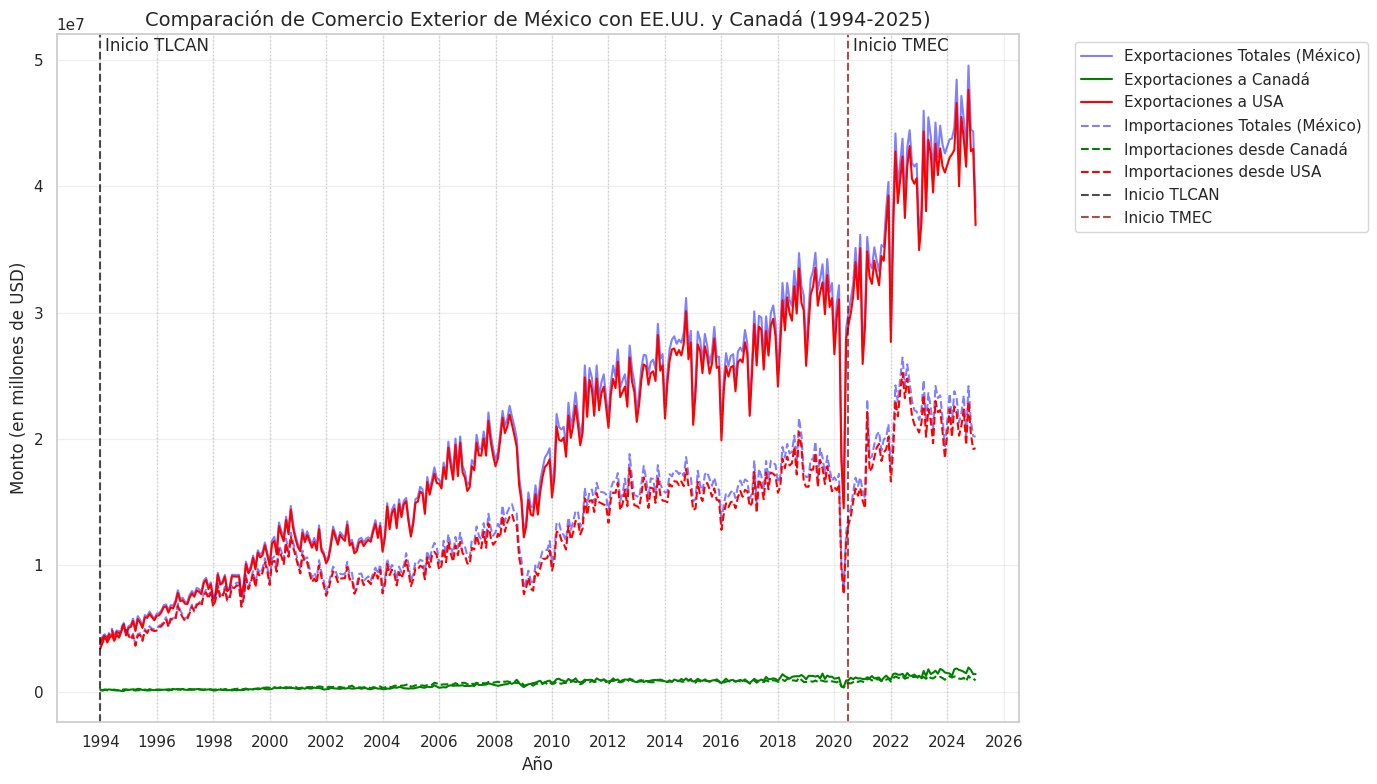

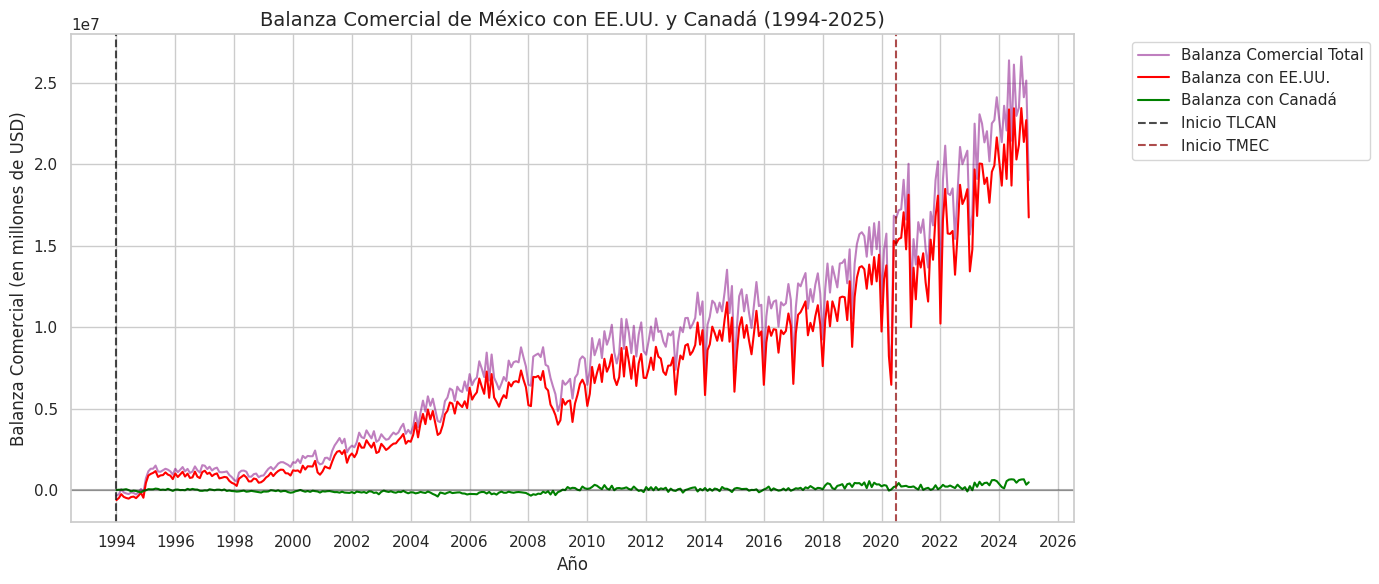

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('data.csv', encoding='latin1')
data['fecha'] = data['fecha'].str.replace('\r', '').str.strip()
try:
    data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m')
except ValueError:
    try:
    
        data['fecha'] = pd.to_datetime(data['fecha'], errors='coerce')
        
    
        nat_indices = data['fecha'].isna()
        if nat_indices.any():
            print(f"Warning: Could not parse {nat_indices.sum()} date values.")
            print("Sample of unparsed values:", data.loc[nat_indices, 'fecha'].head())
            data = data.dropna(subset=['fecha'])
    except Exception as e:
    
        print(f"Date parsing failed: {e}")
        print("Attempting manual date parsing...")
        
        def manual_parse(date_str):
            try:
                parts = date_str.split('/')
                if len(parts) >= 2:
                    year = int(parts[0])
                    month = int(parts[1])
                    return pd.Timestamp(year=year, month=month, day=1)
                else:
                    return pd.NaT
            except:
                return pd.NaT
                
        data['fecha'] = data['fecha'].apply(manual_parse)
        data = data.dropna(subset=['fecha'])

print("Date range:", data['fecha'].min(), "to", data['fecha'].max())
print("Number of records:", len(data))

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plt.plot(data['fecha'], data['exportaciones_usa'], label='Exportaciones Totales (México)', color='blue',alpha=0.5)
plt.plot(data['fecha'], data['exportaciones_canada'], label='Exportaciones a Canadá', color='green')
plt.plot(data['fecha'], data['exportaciones_total'], label='Exportaciones a USA', color='red')

plt.plot(data['fecha'], data['importaciones_total'], label='Importaciones Totales (México)', 
         color='blue', linestyle='--',alpha=0.5)
plt.plot(data['fecha'], data['importaciones_canada'], label='Importaciones desde Canadá', 
         color='green', linestyle='--')
plt.plot(data['fecha'], data['importaciones_usa'], label='Importaciones desde USA', 
         color='red', linestyle='--')

years = mdates.YearLocator(2) 
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

min_y = data[['exportaciones_usa', 'exportaciones_canada', 'exportaciones_total',
              'importaciones_total', 'importaciones_canada', 'importaciones_total']].min().min()
max_y = data[['exportaciones_usa', 'exportaciones_canada', 'exportaciones_total',
              'importaciones_total', 'importaciones_canada', 'importaciones_total']].max().max() * 1.1

fecha_tlcan = pd.to_datetime('1994-01-01')
fecha_tmec = pd.to_datetime('2020-07-01')

plt.axvline(x=fecha_tlcan, color='black', linestyle='--', 
           alpha=0.7, linewidth=1.5, label='Inicio TLCAN')
plt.axvline(x=fecha_tmec, color='darkred', linestyle='--', 
           alpha=0.7, linewidth=1.5, label='Inicio TMEC')

plt.text(fecha_tlcan + pd.DateOffset(months=2), max_y*0.95, 'Inicio TLCAN', 
         horizontalalignment='left', verticalalignment='top')
plt.text(fecha_tmec + pd.DateOffset(months=2), max_y*0.95, 'Inicio TMEC', 
         horizontalalignment='left', verticalalignment='top')

for year in range(1996, 2020, 2): 
    if year != 1994 and year != 2020:
        plt.axvline(x=pd.to_datetime(f'{year}-01-01'), color='gray', linestyle=':', 
                   alpha=0.3, linewidth=1)

for year in range(2022, 2026, 2):
    plt.axvline(x=pd.to_datetime(f'{year}-01-01'), color='gray', linestyle=':', 
               alpha=0.3, linewidth=1)

plt.title('Comparación de Comercio Exterior de México con EE.UU. y Canadá (1994-2025)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Monto (en millones de USD)', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
unique = []
unique_handles = []
unique_labels = []
for handle, label in zip(handles, labels):
    if label not in unique:
        unique.append(label)
        unique_handles.append(handle)
        unique_labels.append(label)
        
plt.legend(unique_handles, unique_labels, title='', bbox_to_anchor=(1.05, 1), 
           loc='upper left', frameon=True)

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

data['balanza_total'] = data['exportaciones_total'] - data['importaciones_total']
data['balanza_canada'] = data['exportaciones_canada'] - data['importaciones_canada']
data['balanza_usa'] = data['exportaciones_usa'] - data['importaciones_usa']

plt.plot(data['fecha'], data['balanza_usa'], label='Balanza Comercial Total', color='purple',alpha=0.5)
plt.plot(data['fecha'], data['balanza_total'], label='Balanza con EE.UU.', color='red')
plt.plot(data['fecha'], data['balanza_canada'], label='Balanza con Canadá', color='green')

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.axvline(x=fecha_tlcan, color='black', linestyle='--', 
           alpha=0.7, linewidth=1.5, label='Inicio TLCAN')
plt.axvline(x=fecha_tmec, color='darkred', linestyle='--', 
           alpha=0.7, linewidth=1.5, label='Inicio TMEC')

plt.title('Balanza Comercial de México con EE.UU. y Canadá (1994-2025)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Balanza Comercial (en millones de USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Grafico utilizado

Utilice line plot para visualizar los datos comerciales a lo largo del tiempo, ya que muestra las posibles tendencias y patrones a lo largo del tiempo, simultaneamente se pueden apreciar los cambios entre, en este caso, 2 paises pero podrian ser mas. Se puede visualizar el impacto de eventos importantes como la implementación del TLCAN en 1994 y del T-MEC en 2020, la pandemia de coronavirus en 2020, e incluso la crisis economica del 2008. Tambien noto cierta tendencia cada fin de a~no las exportaciones e importaciones se desploman luego de ser disparadas las festividades.

Ademas, la segunda grafica muestra la balanza comercial, lo que permite apreciar de forma clara el saldo neto del comercio con cada país.

## Decisiones de diseño que mejoraron la claridad

El código implementa varias decisiones de diseño que mejoran significativamente la claridad de la visualización:

Para la primera grafica:
   - El de colores distintos para cada país y el uso de líneas continuas para exportaciones y discontinuas para importaciones permite identificar cada serie de datos.
   - Líneas verticales punteadas para señalar el inicio del TLCAN y del T-MEC
   - Etiquetas de texto para identificar estos eventos
   - Configuración personalizada del formato de fechas en el eje X, mediante `YearLocator(2)` para mostrar marcas cada dos años en formato adecuado con `DateFormatter('%Y')`
   - Posicionamiento deliberado de las etiquetas fuera del área del grafico para no obstruir los datos

En la segunda grafica
   - Visualizacion específica para la balanza comercial
   - Linea de referencia en cero para facilitar la interpretación de superavit o deficit
   - Mantenimiento del mismo diseño de marcadores temporales para consistencia

Desde el punto de vista de Mexico, esta visualizacion permite observar claramente la evolucion del volumen comercial con sus principales socios a lo largo de tres decadas. El impacto de los acuerdos comerciales en los flujos de importación y exportación es evidente. Las tendencias en la balanza comercial, muestran los períodos de superavit o deficit con respecto a Estados Unidos y Canada.